## Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama

**Adım 1**: Gerekli kütüphanelerin indirilmesi ve veri setini yükleme

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_org = pd.read_csv("persona.csv")
df = data_org.copy()
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir. Yani 0-1 satırları aynı müşteriye ait veriler olabilir.

**Adım 2**: Veri setini yakından tanıyalım..

In [3]:
df.info() #5k gözlem, 5 değişken. Veri tipleri: 'int64'(2),'object'(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [4]:
df.describe().T # nümerik değişkenlerin özet istatistikleri

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [5]:
df.isnull().sum() #hiç eksik veri yok.

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

**Adım 2.1: Veri Görselleştirme**

Yüzdelik Oran Bilgisi 

         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52


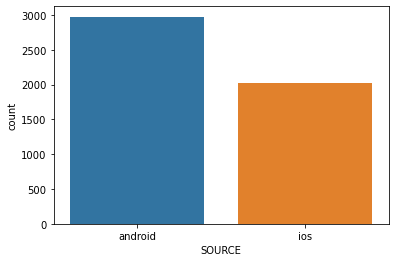

Yüzdelik Oran Bilgisi 

         SEX  Ratio
female  2621  52.42
male    2379  47.58


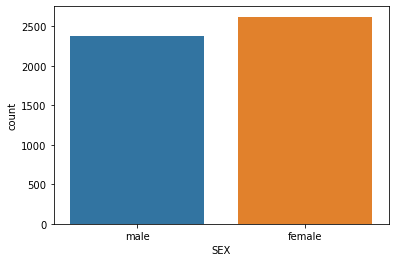

Yüzdelik Oran Bilgisi 

     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60


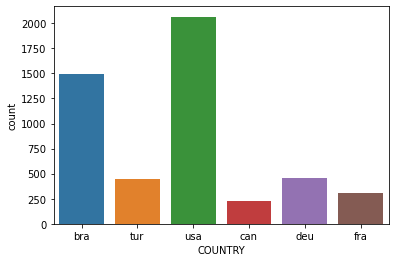

In [6]:
#Kategorik değişkenlerin Yüzde oranlarını ver ve görselleştir

def cat_summary(dataframe, col_name, plot=False): # yüzde oranlarını ver ve görselleştir
    print("Yüzdelik Oran Bilgisi \n")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
        
        
list = ["SOURCE","SEX","COUNTRY"]
for i in list:
    cat_summary(df,i,True)

count    5000.000000
mean       34.132000
std        12.464897
min         9.000000
5%         19.000000
10%        19.000000
20%        19.000000
30%        29.000000
40%        29.000000
50%        39.000000
60%        39.000000
70%        39.000000
80%        49.000000
90%        49.000000
95%        49.000000
99%        59.000000
max        59.000000
Name: PRICE, dtype: float64


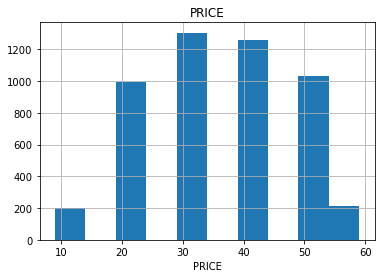

count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
5%         15.000000
10%        15.000000
20%        16.000000
30%        17.000000
40%        19.000000
50%        21.000000
60%        23.000000
70%        26.000000
80%        30.000000
90%        36.000000
95%        43.000000
99%        53.000000
max        66.000000
Name: AGE, dtype: float64


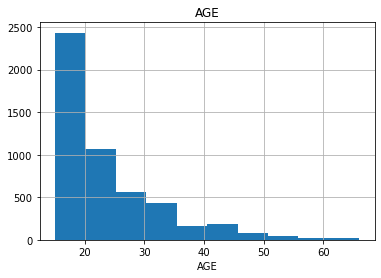

In [7]:
#Nümerik değişkenlerin dağılım analizi

def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

list = ["PRICE", "AGE"]
for i in list:
    num_summary(df, i, plot=True)

**Adım 3**: Amaç ve istenen görevler

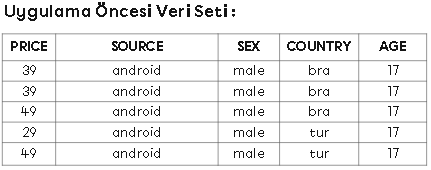

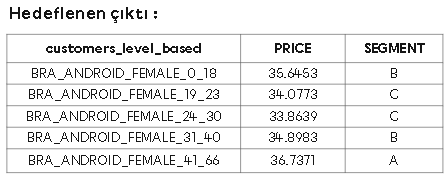

### GÖREV 1
**Aşağıdaki soruları yanıtlayınız.**

- Kaç unique SOURCE vardır? Frekansları Nedir?

In [8]:
print(df["SOURCE"].nunique())
df["SOURCE"].value_counts()

2


android    2974
ios        2026
Name: SOURCE, dtype: int64

- Kaç unique PRICE vardır?

In [9]:
print(df["PRICE"].nunique())

6


- Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [10]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

- Hangi ülkeden kaçar tane satış olmuş. (Aslında görselleş halinde görmüştük)

In [11]:
df["COUNTRY"].value_counts()
#df.groupby("COUNTRY")["PRICE"].count()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

- Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [12]:
#df.groupby("COUNTRY")["PRICE"].sum()
df.groupby("COUNTRY").agg({"PRICE": "sum"}) #agg alışmak önemli, birden fazla değişkene çoklu toplulaştırma fonk. uygulayabilme imkanı sağlar.

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


- SOURCE türlerine göre satış sayıları nedir?

In [13]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

- Ülkelere göre PRICE ortalamaları nedir?

In [14]:
df.groupby("COUNTRY").agg({"PRICE": "mean"})
#df.groupby(by=['COUNTRY']).agg({"PRICE": "mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


- SOURCE'lara göre PRICE ortalamaları nedir?

In [15]:
df.groupby("SOURCE").agg({"PRICE": "mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


- COUNTRY - SOURCE kırılımında PRICE ortalamaları nedir?

In [16]:
df.groupby(["COUNTRY", "SOURCE"]).agg({"PRICE": "mean"}) #kırılımı göstermek için list[] tipinde kolonları almalıyız.

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

### GÖREV 2
**COUNTRY, SOURCE, SEX, AGE kırılımında >>ortalama kazanç<< nedir?**

In [17]:
list = ["COUNTRY", "SOURCE", "SEX", "AGE"]
df.groupby(list).agg({"PRICE": "mean"}).head()

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897

### GÖREV 3
**Çıktıyı PRICE'a göre sıralayınız**

Önceki soruda çıktıyı daha iyi görebilmek için sort_values metodunu azalan olacak şekilde PRICE'a göre uygulayınız.

Çıktıyı agg_df olarak kaydediniz.

In [18]:
list = ["COUNTRY", "SOURCE", "SEX", "AGE"]
agg_df = df.groupby(list).agg({"PRICE": "mean"}).sort_values("PRICE", ascending = False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


### GÖREV 3
**Indexte yer alan isimleri değişken ismine çeviriniz**

Üçüncü sorunun çıktısında yer alan PRICE dışındaki tüm değişkenler index isimleridir. Bu isimleri değişken isimlerini çeviriniz.

In [19]:
agg_df.info() #Şuan görüldüğü izere sadece PRICE değişkeni kolon olarak gözüküyor.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 348 entries, ('bra', 'android', 'male', 46) to ('deu', 'android', 'male', 26)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRICE   348 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [20]:
agg_df = agg_df.reset_index() #index değerlerini 0'lar ve index olarak gözüken değişkenleri kolon (veri setinin özelliği) yapar.
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


### GÖREV 5
**Age değişkenini kategorik değişkene çeviriniz ve agg_df'e ekleyiniz.**

Age sayısal değişkenini kategorik değişkene çeviriniz.

Aralıkları ikna edici şekilde oluşturunuz.

Örneğin '0_18', '19-23', '24-30', '31-40', '41-70'

In [21]:
df["AGE"].nunique()

quantiles = [0, 18, 23, 30, 40, 70]
#bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()] yaş sınırını globalleştirmek için

my_labels=['0_18', '19_23', '24_30', '31_40', '41_70']
#mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())] yaş sınırı global

agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], quantiles, labels = my_labels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


### GÖREV 6

**Yeni seviye tabanlı müşterileri (persona) tanımlayınız**

Yeni **seviye tabanlı müşterileri (persona)** tanımlayınız ve veri setine değişken olarak ekleyiniz.

Yeni eklenecek değişkenin adı: customers_level_based

Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek **customers_level_based** değişkenini oluşturmanız gerekmektedir.

Dikkat: ListComprehension ile customers_level_based değerleri oluşturulduktan sonra bu değerlerin tekilleştirilmesi gerekmektedir. Örneğin birden fazla şu ifadeden olabilir. USA_ANDROID_MALE_0_18. Bunları groupby'a alıp price ortalamalarını almak gerekmektedir.

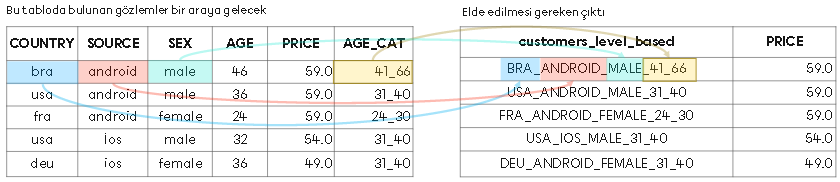

In [22]:
agg_df.columns
#column[0]: PRICE
#column[1]: SOURCE
#column[2]: SEX
#column[3]: COUNTRY
#column[4]: AGE
#column[5]: AGE_CAT

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE', 'AGE_CAT'], dtype='object')

In [23]:
c_l_b = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]

In [24]:
agg_df["customers_level_based"] = c_l_b
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.0,41_70,BRA_ANDROID_MALE_41_70
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [25]:
agg_df = agg_df[["customers_level_based", "PRICE"]] #Elde edilmesi gereken çıktı için
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_70,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0


Dikkat bölümünde yer alan tekilleştirme için;

In [26]:
agg_df["customers_level_based"].value_counts() #görüldüğü üzere birden fazla aynı ifadeler var. groupby işlemi ile PRICE mean değeri verilmesi isteniyor

USA_IOS_FEMALE_24_30        7
USA_ANDROID_MALE_24_30      7
BRA_ANDROID_MALE_24_30      7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_41_70      7
                           ..
CAN_IOS_MALE_31_40          1
CAN_IOS_MALE_41_70          1
FRA_IOS_MALE_41_70          1
CAN_ANDROID_MALE_41_70      1
FRA_ANDROID_MALE_24_30      1
Name: customers_level_based, Length: 109, dtype: int64

In [27]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})
agg_df.head() #groupby yaptık fakat şimdi kolon bilgimiz index değerleri oldu.

,PRICE
customers_level_based,
BRA_ANDROID_FEMALE_0_18,35.645303
BRA_ANDROID_FEMALE_19_23,34.077340
BRA_ANDROID_FEMALE_24_30,33.863946
BRA_ANDROID_FEMALE_31_40,34.898326
BRA_ANDROID_FEMALE_41_70,36.737179


In [28]:
agg_df = agg_df.reset_index()
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179


In [29]:
print(agg_df.value_counts()) #grupladıktan sonra her değerden 1 tane var
print(agg_df.value_counts().max())

agg_df.head() #gruplandı ve Price değerlerinin ortalamaları verildi

customers_level_based    PRICE    
USA_IOS_MALE_41_70       35.750000    1
DEU_ANDROID_MALE_0_18    37.248792    1
CAN_IOS_FEMALE_0_18      31.352941    1
CAN_IOS_FEMALE_24_30     31.727273    1
CAN_IOS_MALE_0_18        36.746032    1
                                     ..
TUR_ANDROID_MALE_19_23   27.333333    1
TUR_ANDROID_MALE_24_30   39.439103    1
TUR_ANDROID_MALE_31_40   29.000000    1
TUR_ANDROID_MALE_41_70   39.000000    1
BRA_ANDROID_FEMALE_0_18  35.645303    1
Length: 109, dtype: int64
1


,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179


### GÖREV 7

**Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE'a göre 4 segmente ayırınız.**

Segmentleri **SEGMENT** isimlendirmesi ile değişken olarak **agg_df**'e ekleyiniz.

Segmentleri betimleyiniz. (Segmentlere göre groupby yapıp price mean, max, sum'larını alınız).

In [37]:
my_label = ["D", "C", "B", "A"] #bize önerilen 4 segment gruplaması
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels = my_label)
agg_df.head()

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A


In [44]:
agg_df.groupby("SEGMENT").agg({"PRICE": ["mean", "max", "sum"]})
# qcut PRICE'ı qcut ederek ordinal kategorik bir değişken SEGMENT'i oluşturmuş. (A > B > C > D)

PRICE                        
              mean        max          sum
SEGMENT                                   
D        29.206780  32.333333   817.789833
C        33.509674  34.077340   904.761209
B        34.999645  36.000000   944.990411
A        38.691234  45.428571  1044.663328

### GÖREV 8

**Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.**

33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

In [45]:
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [46]:
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
